# Prédiction des retards

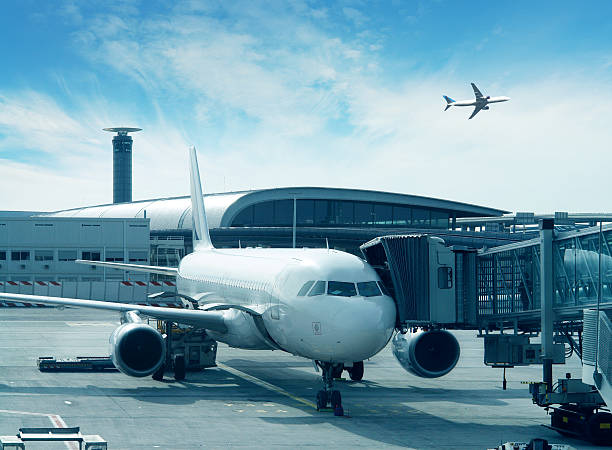

# Problématique ?

### Peut-on prédir si un vol programmé aura du retard ou pas, selon diverses données en notre possession ?

# Quelles sont ces données ?

### Nous avons travaillé sur une base de données contenant différents DataFrame:
    .DataFrame Flights ==> données sur un vol en particuliers en départ des 3 aéroports de New York
    .DataFrame Airlines ==> données sur les compagnies aériennes
    .DataFrame Planes ==> données sur les avions
    .DataFrame Weather ==> données sur la météo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_airlines = pd.read_csv('Data/airlines.csv' , na_values= ' ')

In [3]:
df_airlines.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [4]:
df_airlines.describe()

,carrier,name
count,16,16
unique,16,16
top,UA,Endeavor Air Inc.
freq,1,1


In [5]:
df_airlines.isna().sum()
#NO NaN in airlines dataframe

carrier    0
name       0
dtype: int64

In [6]:
df_airports = pd.read_csv('Data/airports.csv', na_values= ' ')

In [7]:
df_airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [8]:
df_airports.describe(include= 'object')

,faa,name,dst,tzone
count,1458,1458,1458,1458
unique,1458,1440,3,10
top,CDW,Municipal Airport,A,America/New_York
freq,1,5,1388,519


In [9]:
df_airports.isna().sum()
#NO NaN in airports dataframe

faa      0
name     0
lat      0
lon      0
alt      0
tz       0
dst      0
tzone    0
dtype: int64

In [10]:
df_flights = pd.read_csv('Data/flights.csv' , na_values= ' ')

In [11]:
df_flights['dep_delay'][df_flights['dep_delay'] == np.nan]

Series([], Name: dep_delay, dtype: float64)

In [12]:
df_flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [13]:
df_flights.describe().T

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.548510,3.414457,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.0,1401.0,1744.0,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
flight,336776.0,1971.923620,1632.471938,1.0,553.0,1496.0,3465.0,8500.0


In [14]:
df_flights.describe(include='object').T

,count,unique,top,freq
carrier,336776,16,UA,58665
tailnum,334264,4043,N725MQ,575
origin,336776,3,EWR,120835
dest,336776,105,ORD,17283
time_hour,336776,6936,2013-09-20T08:00:00Z,94


In [15]:
for i in range(len(df_flights['origin'].unique())):
    print(df_airports[['name' , 'tzone']][df_airports['faa'] == df_flights['origin'].unique()[i]])
    
'''Question : je remarque dans le describe plus haut qu'il n y a que 3 aéroports de départ pour tous les vols,
je veux donc savoir quels sont ces derniers ?

Réponses : (affichée en dessous) ==> c'est les trois aéroports de new york
'''

                    name             tzone
460  Newark Liberty Intl  America/New_York
           name             tzone
786  La Guardia  America/New_York
                    name             tzone
691  John F Kennedy Intl  America/New_York


"Question : je remarque dans le describe plus haut qu'il n y a que 3 aéroports de départ pour tous les vols,\nje veux donc savoir quels sont ces derniers ?\n\nRéponses : (affichée en dessous) ==> c'est les trois aéroports de new york\n"

In [16]:
print(df_flights.isna().sum() , '\n\n' , round((df_flights['dep_delay'].isna().sum()*100)/df_flights.shape[0]) ,'% de NaN dans la colonne de retard')

'''
Problématique : 
Nous avons 2% de NaN dans notre colonne dep_delay, comment faire un cleaning, au début j'ai pensé faire une 
soustraction de dep_time et arr_time, mais le problème c'est que les valeurs sont manquantes dans ces deux colonnes

solution : 
La solution pour le cleaning est de supprimer les observations avec des NaN pour pouvoir faire l'entrainement
'''

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64 

 2 % de NaN dans la colonne de retard


"\nProblématique : \nNous avons 2% de NaN dans notre colonne dep_delay, comment faire un cleaning, au début j'ai pensé faire une \nsoustraction de dep_time et arr_time, mais le problème c'est que les valeurs sont manquantes dans ces deux colonnes\n\nsolution : \nLa solution pour le cleaning est de supprimer les observations avec des NaN pour pouvoir faire l'entrainement\n"

In [17]:
df_flights.dropna(subset= ['dep_delay' , 'arr_delay'] , inplace= True)

In [18]:
print(df_flights.isna().sum() , '\n\n' , round((df_flights['dep_delay'].isna().sum()*100)/df_flights.shape[0]) ,'% de NaN dans la colonne de retard')

'''
J'ai supprimé toutes les lignes contenant des NaN dans la colonne dep_delay
Résultats ce-dessous
'''

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64 

 0 % de NaN dans la colonne de retard


"\nJ'ai supprimé toutes les lignes contenant des NaN dans la colonne dep_delay\nRésultats ce-dessous\n"

In [19]:
df_flights['target_delay'] = np.where(pd.to_numeric(df_flights['dep_delay']) <= 0 , 0 , 1)

In [20]:
df_flights['target_delay'].isna().sum()

0

In [21]:
df_flights[['target_delay']]

,target_delay
0,1
1,1
2,1
3,0
4,0
...,...
336765,0
336766,0
336767,0
336768,1


In [22]:
df_planes = pd.read_csv('Data/planes.csv', na_values= ' ')

In [23]:
df_planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [24]:
df_planes.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3252.0,2000.484010,7.193425,1956.0,1997.0,2001.0,2005.0,2013.0
engines,3322.0,1.995184,0.117593,1.0,2.0,2.0,2.0,4.0
seats,3322.0,154.316376,73.654974,2.0,140.0,149.0,182.0,450.0
speed,23.0,236.782609,149.759794,90.0,107.5,162.0,432.0,432.0


In [25]:
df_planes.describe(include = 'object').T

,count,unique,top,freq
tailnum,3322,3322,N562UA,1
type,3322,3,Fixed wing multi engine,3292
manufacturer,3322,35,BOEING,1630
model,3322,127,737-7H4,361
engine,3322,6,Turbo-fan,2750


In [26]:
df_planes.isna().sum()

tailnum            0
year              70
type               0
manufacturer       0
model              0
engines            0
seats              0
speed           3299
engine             0
dtype: int64

In [27]:
'''
Maintenant que l'on a notre dataframe FLIGHTS cleané on peut passé à la partie machine learning
'''

"\nMaintenant que l'on a notre dataframe FLIGHTS cleané on peut passé à la partie machine learning\n"

In [28]:
#Remplacer par label encoder
'''
pour utiliser KNN nous avons besoin de travailler avec des variables numérique, c'est pour cela 
qu'on a remplacé les cols 'carrier' et 'origin' par des chiffres
'''
df_flights['carrier'] = df_flights['carrier'].replace(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS','9E', 'F9', 'HA', 'YV', 'OO'],list(range(1 , 17)))

In [29]:
df_flights.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier             int64
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
target_delay        int64
dtype: object

In [30]:
#df_flights['origin'] = df_flights['origin'].replace(['EWR', 'LGA', 'JFK'] , [1,2,3])

In [31]:
df_flights['carrier'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [32]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

X = df_flights.loc[:, df_flights.columns != 'target_delay'].select_dtypes(include=numerics)
y = df_flights['target_delay']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, stratify=y, random_state=42)

In [34]:
# Vérifier la répartition des données dans y_train
(y_train.value_counts(normalize=True).sort_index())*100

0    60.975361
1    39.024639
Name: target_delay, dtype: float64

In [35]:
# Vérifier la répartition des données dans y_test
(y_test.value_counts(normalize=True).sort_index())*100

0    60.976087
1    39.023913
Name: target_delay, dtype: float64

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=3 , n_jobs=-1)

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [39]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [40]:
y_test

56245     0
32873     1
27767     1
126079    0
72852     0
         ..
12402     0
88053     0
97171     0
86489     0
217296    1
Name: target_delay, Length: 81837, dtype: int64

In [41]:
acc = knn.score(X_test, y_test)
acc

0.8855041118320564

In [42]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[46727,  3174],
       [ 6196, 25740]])

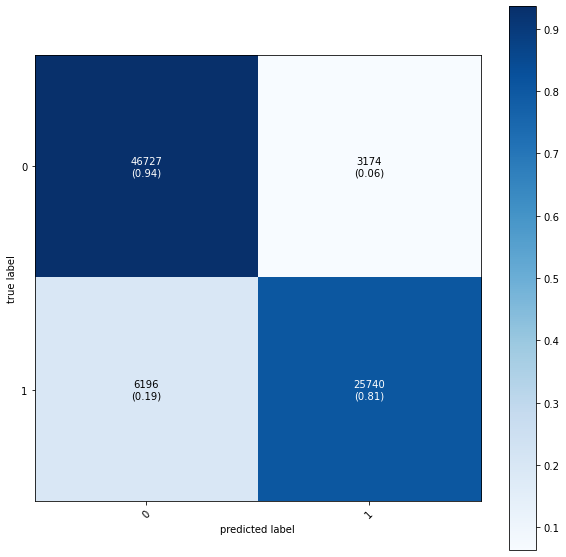

In [43]:
from mlxtend.plotting import plot_confusion_matrix

class_names = pd.Series(df_flights['target_delay'].unique()).sort_values().values

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names,
                                figsize= (10 , 10)
)

In [44]:
# Boucle à améliorer => k range de nb impair (pr les besoins du vote à majorité)
err_default = 1 - acc
neighbors = range(2, 5)
errors = []

for k in neighbors:
	knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1) 	# 
	knn.fit(X_train, y_train)
	err = round((1.0 - knn.score(X_test, y_test)) * 100, 3)
	errors.append(err)
	print(f"\n\nResults : knn = {knn.n_neighbors} => err_test = {err}\n")
	print(f'Improvement of {-(err - err_default)}%\n\n')



Results : knn = 2 => err_test = 12.08

Improvement of -11.965504111832056%




Results : knn = 3 => err_test = 11.45

Improvement of -11.335504111832055%




Results : knn = 4 => err_test = 12.383

Improvement of -12.268504111832055%




Text(0.5, 0, 'neighbors')

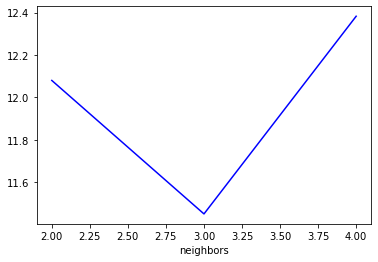

In [45]:
from matplotlib import pyplot as plt

plt.plot(neighbors, errors, 'b')
plt.xlabel('neighbors')

In [46]:
'''
Dans la partie ci-dessous, j'ai essayé de rajouter les données des avions en plus des données des vols
'''

"\nDans la partie ci-dessous, j'ai essayé de rajouter les données des avions en plus des données des vols\n"

In [47]:
test = pd.merge(df_flights, df_planes, how="inner", on=["tailnum"])

In [48]:
test.head()

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,time_hour,target_delay,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,1,...,2013-01-01T05:00:00Z,1,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
1,2013,1,8,1435.0,1440,-5.0,1717.0,1746,-29.0,1,...,2013-01-08T14:00:00Z,0,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
2,2013,1,9,717.0,700,17.0,812.0,815,-3.0,1,...,2013-01-09T07:00:00Z,1,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
3,2013,1,9,1143.0,1144,-1.0,1425.0,1445,-20.0,1,...,2013-01-09T11:00:00Z,0,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
4,2013,1,13,835.0,824,11.0,1030.0,951,39.0,1,...,2013-01-13T08:00:00Z,1,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan


In [49]:
print(test.isna().sum())

'''
On a des NaN dans les colonnes :

year_y ==> année de mise en service de l'avion ==> supprimer les instances where NaN
speed ==> remplacer par moyenne selon catactéristiques de l'avion

'''

year_x                 0
month                  0
day                    0
dep_time               0
sched_dep_time         0
dep_delay              0
arr_time               0
sched_arr_time         0
arr_delay              0
carrier                0
flight                 0
tailnum                0
origin                 0
dest                   0
air_time               0
distance               0
hour                   0
minute                 0
time_hour              0
target_delay           0
year_y              5164
type                   0
manufacturer           0
model                  0
engines                0
seats                  0
speed             278097
engine                 0
dtype: int64


"\nOn a des NaN dans les colonnes :\n\nyear_y ==> année de mise en service de l'avion ==> supprimer les instances where NaN\nspeed ==> remplacer par moyenne selon catactéristiques de l'avion\n\n"

In [50]:
test['speed'].fillna(value = test['speed'].mean() , inplace= True)

In [51]:
test.dropna(subset=['year_y'] ,inplace= True)

In [52]:
print(test.isna().sum())
'''
Voila le df est propre a nouveau
'''

year_x            0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
target_delay      0
year_y            0
type              0
manufacturer      0
model             0
engines           0
seats             0
speed             0
engine            0
dtype: int64


'\nVoila le df est propre a nouveau\n'

In [53]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

X2 = test.loc[:, test.columns != 'target_delay'].select_dtypes(include=numerics)
y2 = test['target_delay']

In [54]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=1/4, stratify=y2, random_state=42)

In [55]:
(y_train2.value_counts(normalize=True).sort_index())*100

0    59.759773
1    40.240227
Name: target_delay, dtype: float64

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn2 = KNeighborsClassifier(n_neighbors=3 , n_jobs=-1)

In [58]:
knn2.fit(X_train2, y_train2)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [59]:
y_pred2 = knn.predict(X_test)
y_pred2

array([0, 1, 1, ..., 0, 0, 1])

In [60]:
acc2 = knn.score(X_test, y_test)
acc2

0.8761684812493127

In [61]:
df_weather = pd.read_csv('Data/weather.csv', na_values= ' ')

In [62]:
df_weather.head(6)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01T00:00:00Z
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01T01:00:00Z
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01T02:00:00Z
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01T03:00:00Z
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01T04:00:00Z
5,EWR,2013,1,1,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,2013-01-01T06:00:00Z


In [63]:
df_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
year,26130.0,2013.000000,0.000000,2013.00,2013.000000,2013.000000,2013.000000,2013.000000
month,26130.0,6.505741,3.440031,1.00,4.000000,7.000000,9.000000,12.000000
day,26130.0,15.679717,8.765022,1.00,8.000000,16.000000,23.000000,31.000000
hour,26130.0,11.518408,6.916581,0.00,6.000000,12.000000,18.000000,23.000000
temp,26129.0,55.203515,17.782124,10.94,39.920000,55.040000,69.980000,100.040000
dewp,26129.0,41.385399,19.371649,-9.94,26.060000,42.080000,57.920000,78.080000
humid,26129.0,62.347322,19.196078,12.74,46.990000,61.660000,78.620000,100.000000
wind_dir,25712.0,198.066661,107.841624,0.00,120.000000,220.000000,290.000000,360.000000
wind_speed,26127.0,10.395868,8.521200,0.00,6.904680,9.206240,13.809360,1048.360580
wind_gust,26127.0,11.963357,9.806027,0.00,7.945768,10.594357,15.891535,1206.432388


In [64]:
df_weather.isna().sum()

origin           0
year             0
month            0
day              0
hour             0
temp             1
dewp             1
humid            1
wind_dir       418
wind_speed       3
wind_gust        3
precip           0
pressure      2730
visib            0
time_hour        0
dtype: int64

In [117]:
'''
Création d'une fonction qui retourne le premier digit d'un nombre

first_digit(535) ==> 5
'''

import math

def first_digit (num):
    
    digits = int(math.log10(num))
    first_digit = int(num / pow(10, digits))
    return first_digit

In [139]:
hour = []
for i in df_flights["dep_time"].values:
    hour.append(first_digit(i))
    
df_flights["hour"] = hour

In [142]:
'''
L'instruction ci-dessous ==> replacer la col 'hour' pour l'avoir à la meme position que dans le df weather
'''
df_flights = df_flights[[
    'year',
    'month',
    'day',
    'hour',
    'dep_time',
    'sched_dep_time',
    'dep_delay',
    'arr_time',
    'sched_arr_time',
    'arr_delay',
    'carrier',
    'flight',
    'tailnum',
    'origin',
    'dest',
    'air_time',
    'distance',
    'minute',
    'time_hour',
    'target_delay']]

In [143]:
df_flights.head()

,year,month,day,hour,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,minute,time_hour,target_delay
0,2013,1,1,5,517.0,515,2.0,830.0,819,11.0,1,1545,N14228,EWR,IAH,227.0,1400,15,2013-01-01T05:00:00Z,1
1,2013,1,1,5,533.0,529,4.0,850.0,830,20.0,1,1714,N24211,LGA,IAH,227.0,1416,29,2013-01-01T05:00:00Z,1
2,2013,1,1,5,542.0,540,2.0,923.0,850,33.0,2,1141,N619AA,JFK,MIA,160.0,1089,40,2013-01-01T05:00:00Z,1
3,2013,1,1,5,544.0,545,-1.0,1004.0,1022,-18.0,3,725,N804JB,JFK,BQN,183.0,1576,45,2013-01-01T05:00:00Z,0
4,2013,1,1,5,554.0,600,-6.0,812.0,837,-25.0,4,461,N668DN,LGA,ATL,116.0,762,0,2013-01-01T06:00:00Z,0


In [144]:
'''
Ici j'assaye de rajouter les données de la météo mais j'ai un prblm

PRBLM RÉGLÉ
'''

"\nIci j'assaye de rajouter les données de la météo mais j'ai un prblm\n\nPRBLM RÉGLÉ\n"

In [145]:
test_with_weather = pd.merge(df_flights, df_weather, how="inner", on=["year" , "month" , 'day' , 'hour'])

In [146]:
test_with_weather.shape

(970444, 31)

In [147]:
print(test_with_weather.isna().sum())
'''
Notre df n'est pas cleané ==> remplacer les val par la moyenne
'''

year                  0
month                 0
day                   0
hour                  0
dep_time              0
sched_dep_time        0
dep_delay             0
arr_time              0
sched_arr_time        0
arr_delay             0
carrier               0
flight                0
tailnum               0
origin_x              0
dest                  0
air_time              0
distance              0
minute                0
time_hour_x           0
target_delay          0
origin_y              0
temp                  0
dewp                  0
humid                 0
wind_dir           9349
wind_speed            0
wind_gust             0
precip                0
pressure          93888
visib                 0
time_hour_y           0
dtype: int64


"\nNotre df n'est pas cleané ==> remplacer les val par la moyenne\n"

In [148]:
test_with_weather['temp'].fillna(value = test_with_weather['temp'].mean() , inplace= True)
test_with_weather['dewp'].fillna(value = test_with_weather['dewp'].mean() , inplace= True)
test_with_weather['humid'].fillna(value = test_with_weather['humid'].mean() , inplace= True)
test_with_weather['wind_dir'].fillna(value = test_with_weather['wind_dir'].mean() , inplace= True)
test_with_weather['wind_speed'].fillna(value = test_with_weather['wind_speed'].mean() , inplace= True)
test_with_weather['wind_gust'].fillna(value = test_with_weather['wind_gust'].mean() , inplace= True)
test_with_weather['pressure'].fillna(value = test_with_weather['pressure'].mean() , inplace= True)

In [149]:
print(test_with_weather.isna().sum())
'''
Le df test_with_weather est cleané ==> on peut passer au machine learning
'''

year              0
month             0
day               0
hour              0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin_x          0
dest              0
air_time          0
distance          0
minute            0
time_hour_x       0
target_delay      0
origin_y          0
temp              0
dewp              0
humid             0
wind_dir          0
wind_speed        0
wind_gust         0
precip            0
pressure          0
visib             0
time_hour_y       0
dtype: int64


'\nLe df test_with_weather est cleané ==> on peut passer au machine learning\n'

In [150]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

X3 = test_with_weather.loc[:, test_with_weather.columns != 'target_delay'].select_dtypes(include=numerics)
y3 = test_with_weather['target_delay']

In [151]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=1/4, stratify=y3, random_state=42)

In [152]:
(y_train3.value_counts(normalize=True).sort_index())*100

0    60.899822
1    39.100178
Name: target_delay, dtype: float64

In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
knn3 = KNeighborsClassifier(n_neighbors=3 , n_jobs=-1)

In [155]:
knn3.fit(X_train3, y_train3)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [156]:
y_pred3 = knn.predict(X_test)

In [157]:
acc3 = knn.score(X_test, y_test)
acc3

0.8761684812493127

In [158]:
'''
Maintenant qu'on a utilisé le modèle KNN sur nos données et qu'on a obtenu un score de 88%, on passe au modèle :
    ARBRE DE DÉCISION
'''

#On a prit notre merge entre df_flights et df_planes

"\nMaintenant qu'on a utilisé le modèle KNN sur nos données et qu'on a obtenu un score de 88%, on passe au modèle :\n    ARBRE DE DÉCISION\n"

In [159]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42 ,  max_depth=5)
tree

DecisionTreeClassifier(max_depth=5, random_state=42)

In [160]:
X_train2_dt = X_train2.loc[:, X_train2.columns != 'dep_delay'].select_dtypes(include=numerics)
X_test2_dt = X_test2.loc[:, X_test2.columns != 'dep_delay'].select_dtypes(include=numerics)

In [161]:
tree = tree.fit(X_train2_dt, y_train2)

In [162]:
y_pred4 = tree.predict(X_test2_dt)
y_pred4

array([0, 0, 1, ..., 0, 0, 1])

In [163]:
y_test2.values

array([0, 0, 1, ..., 0, 0, 1])

In [164]:
mat_conf = confusion_matrix(y_test2, y_pred4)
mat_conf
acc4 = mat_conf.diagonal().sum()/mat_conf.sum()
acc4

0.7898895770039729

In [165]:
from sklearn.metrics import accuracy_score
acc_tree = accuracy_score(y_test2, y_pred4)
acc_tree

0.7898895770039729

In [166]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test2, y_pred4)
conf_mat

array([[35727,  5187],
       [ 9198, 18352]])

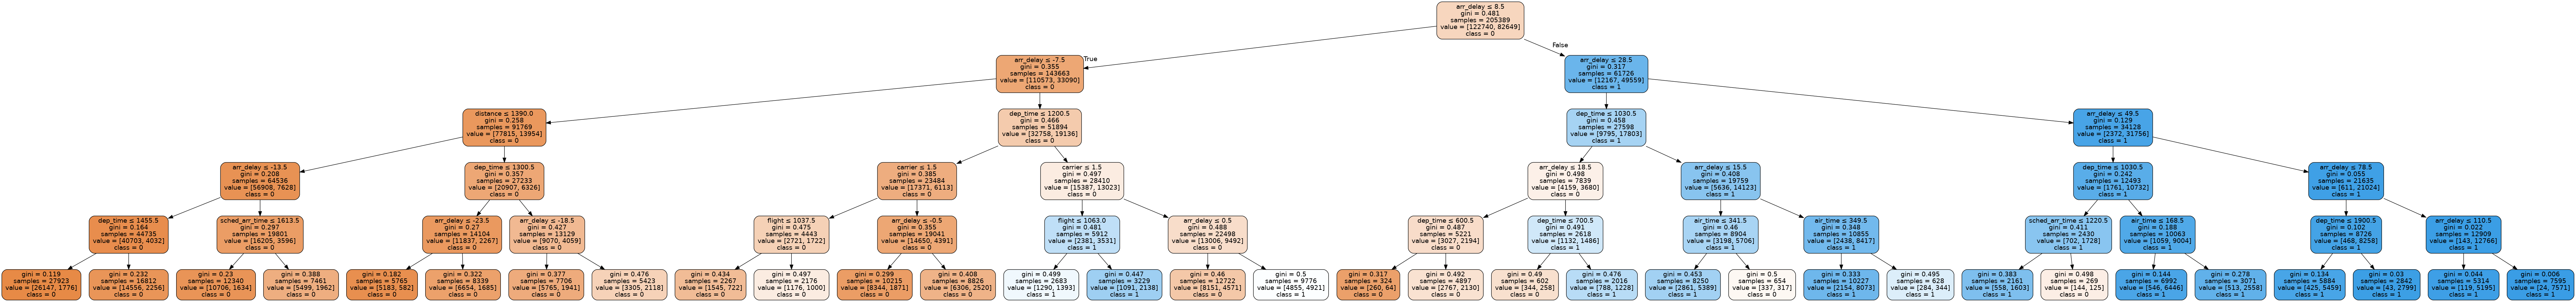

In [167]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train2_dt.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Retard.png')
Image(graph.create_png())

In [ ]:
'''
Random forest
'''

#On a travailler avec le merge entre df_flights et df_weather

In [168]:
X_train_rf = X_train3.loc[:, X_train3.columns != 'dep_delay'].select_dtypes(include=numerics)
X_test_rf = X_test3.loc[:, X_test3.columns != 'dep_delay'].select_dtypes(include=numerics)

In [169]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf

RandomForestClassifier(n_jobs=-1, random_state=42)

In [170]:
rf.fit(X_train_rf, y_train3)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [171]:
rf.n_estimators
rf

RandomForestClassifier(n_jobs=-1, random_state=42)

In [176]:
y_pred5 = rf.predict(X_test_rf)

In [174]:
acc = rf.score(X_test_rf, y_test3)
acc

0.9827625293164778

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

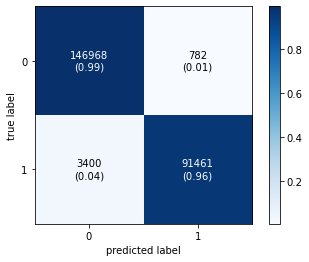

In [177]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
conf_mat = metrics.confusion_matrix(y_test3, y_pred5)
conf_mat

plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

In [178]:
(1 - metrics.accuracy_score(y_test3, y_pred5)) * 100

1.7237470683522216

In [179]:
max_depths = [i for i in np.linspace(start = 1, stop = 10, num = 10, dtype=int)]
max_depths.append(None)
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]



Results : max_depth = 1 => err_test = 26.855

Improvement of -16.865000000000002%




Results : max_depth = 2 => err_test = 23.895

Improvement of -13.905%




Results : max_depth = 3 => err_test = 22.137

Improvement of -12.147%




Results : max_depth = 4 => err_test = 21.815

Improvement of -11.825000000000001%




Results : max_depth = 5 => err_test = 21.306

Improvement of -11.316%




Results : max_depth = 6 => err_test = 20.446

Improvement of -10.456000000000001%




Results : max_depth = 7 => err_test = 19.98

Improvement of -9.99%




Results : max_depth = 8 => err_test = 19.349

Improvement of -9.359%




Results : max_depth = 9 => err_test = 18.806

Improvement of -8.816%




Results : max_depth = 10 => err_test = 18.127

Improvement of -8.136999999999999%




Results : max_depth = None => err_test = 1.724

Improvement of 8.266%




Text(0.5, 0, 'max_depths')

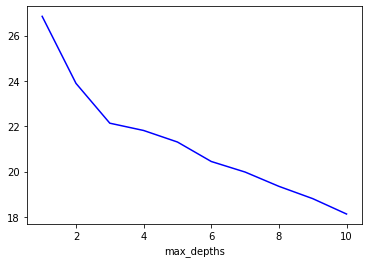

In [180]:
errors = []
err_default = 9.99
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, random_state=42)
    rf.fit(X_train_rf, y_train3)
    err = round((1.0 - rf.score(X_test_rf, y_test3)) * 100, 3)
    errors.append(err)
    print(f"\n\nResults : max_depth = {rf.max_depth} => err_test = {err}\n")
    print(f'Improvement of {err_default - err}%\n\n')


plt.plot(max_depths, errors, 'b')
plt.xlabel('max_depths')

In [185]:
'''
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
n_estimators

'''

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17,
       18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26,
       26, 27, 27, 28, 28, 29, 29, 30, 31])

In [184]:
errors = []
for estimator in n_estimators :
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=42)
   rf.fit(X_train_rf, y_train3)
   err = round((1.0 - rf.score(X_test_rf, y_test3)) * 100, 3)
   errors.append(err)
   print(f"\n\nResults : n_estimators = {rf.n_estimators} => err_test = {err}\n\n")
   print('Improvement of {:0.2f}%.'.format(err_default - err))


plt.plot(n_estimators, errors, label = 'test')
plt.xlabel('n_estimators')
plt.ylabel('err_test')



Results : n_estimators = 1 => err_test = 11.843


Improvement of -1.85%.


Results : n_estimators = 6 => err_test = 4.905


Improvement of 5.08%.


Results : n_estimators = 11 => err_test = 2.938


Improvement of 7.05%.


Results : n_estimators = 16 => err_test = 2.851


Improvement of 7.14%.


Results : n_estimators = 21 => err_test = 2.443


Improvement of 7.55%.


Results : n_estimators = 26 => err_test = 2.454


Improvement of 7.54%.


Results : n_estimators = 31 => err_test = 2.169


Improvement of 7.82%.


KeyboardInterrupt: 

In [ ]:
'''
Kmeans
'''

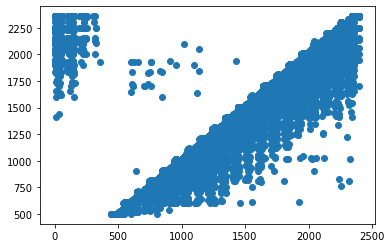

In [186]:
plt.scatter(df_flights['dep_time'], df_flights['sched_dep_time'])

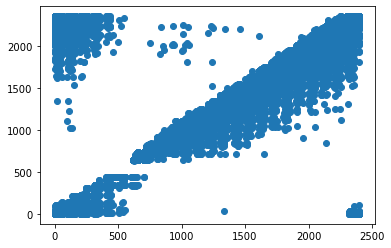

In [187]:
plt.scatter(df_flights['arr_time'], df_flights['sched_arr_time'])

In [188]:
centroids = {1: [1500, 1500], 2: [100, 2300], 3: [800, 1800], 4: [2000, 1000]}

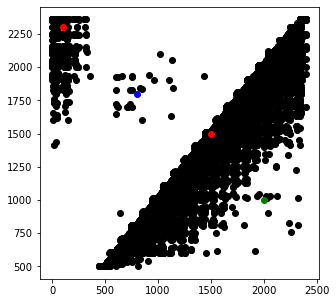

In [189]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_flights['dep_time'], df_flights['sched_dep_time'], c='k')
colmap = {1: 'r', 2: 'r', 3: 'b', 4: 'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

In [190]:
arr_centroids = {1: [1400, 1400], 2: [100, 2200], 3: [0, 0], 4: [2359, 0], 5: [1000, 2000]}

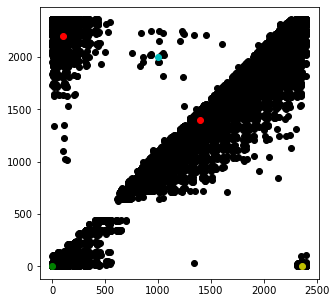

In [191]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_flights['arr_time'], df_flights['sched_arr_time'], c='k')
colmap = {1: 'r', 2: 'r', 3: 'g', 4: 'y', 5: 'c'}
for i in arr_centroids.keys():
    plt.scatter(*arr_centroids[i], color=colmap[i])


In [192]:
def depAssign(df_flights, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df_flights[f'distance_from_{i}'] = (
            np.sqrt(
                (df_flights['dep_time'] - centroids[i][0]) ** 2
                + (df_flights['sched_dep_time'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = [f'distance_from_{i}' for i in centroids.keys()]
    df_flights['closest'] = df_flights.loc[:, centroid_distance_cols].idxmin(axis=1)
    df_flights['closest'] = df_flights['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df_flights['color'] = df_flights['closest'].map(lambda x: colmap[x])
    return df_flights

In [193]:
depAssign(df_flights=df_flights, centroids=centroids)


,year,month,day,hour,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,distance,minute,time_hour,target_delay,distance_from_1,distance_from_2,distance_from_3,distance_from_4,closest,color
0,2013,1,1,5,517.0,515,2.0,830.0,819,11.0,...,1400,15,2013-01-01T05:00:00Z,1,1391.586864,1833.061374,1315.794057,1560.292921,3,g
1,2013,1,1,5,533.0,529,4.0,850.0,830,20.0,...,1416,29,2013-01-01T05:00:00Z,1,1370.375861,1823.164831,1298.741699,1540.756308,3,g
2,2013,1,1,5,542.0,540,2.0,923.0,850,33.0,...,1089,40,2013-01-01T05:00:00Z,1,1356.231544,1814.652584,1286.143071,1528.844008,3,g
3,2013,1,1,5,544.0,545,-1.0,1004.0,1022,-18.0,...,1576,45,2013-01-01T05:00:00Z,0,1351.281244,1810.293070,1280.843862,1525.437970,3,g
4,2013,1,1,5,554.0,600,-6.0,812.0,837,-25.0,...,762,0,2013-01-01T06:00:00Z,0,1305.724320,1759.578359,1224.955509,1500.305302,3,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2,2240.0,2245,-5.0,2334.0,2351,-17.0,...,209,45,2013-09-30T22:00:00Z,0,1050.059522,2140.706659,1507.191096,1267.921528,1,r
336766,2013,9,30,2,2240.0,2250,-10.0,2347.0,7,-20.0,...,301,50,2013-09-30T22:00:00Z,0,1053.612832,2140.584032,1508.674915,1272.831489,1,r
336767,2013,9,30,2,2241.0,2246,-5.0,2345.0,1,-16.0,...,264,46,2013-09-30T22:00:00Z,0,1051.473728,2141.680882,1508.441911,1269.092983,1,r
336768,2013,9,30,2,2307.0,2255,12.0,2359.0,2358,1.0,...,187,55,2013-09-30T22:00:00Z,1,1105.112664,2207.458720,1574.189950,1292.003870,1,r


In [194]:
def depAnim() :
    fig = plt.figure(figsize=(5, 5), constrained_layout = True)
    plt.scatter(df_flights['dep_time'], df_flights['sched_dep_time'], color=df_flights['color'], alpha=0.5, edgecolor='k') #  , alpha=0.5, edgecolor='k'
    colmap = {1: 'r', 2: 'r', 3: 'b', 4: 'g'}
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])

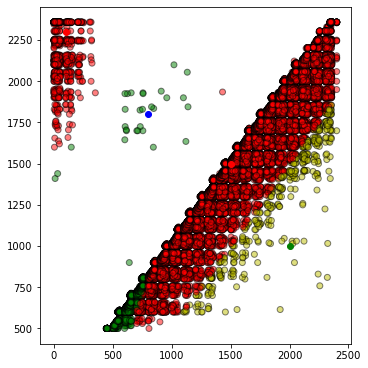

In [195]:
depAnim()

In [196]:
def arrAssign(df_flights, arr_centroids):
    for i in arr_centroids.keys():
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df_flights[f'arr_distance_from_{i}'] = (
            np.sqrt(
                (df_flights['arr_time'] - arr_centroids[i][0]) ** 2
                + (df_flights['sched_arr_time'] - arr_centroids[i][1]) ** 2
            )
        )
    arr_centroid_distance_cols = [f'arr_distance_from_{i}' for i in arr_centroids.keys()]
    df_flights['arr_closest'] = df_flights.loc[:, arr_centroid_distance_cols].idxmin(axis=1)
    df_flights['arr_closest'] = df_flights['arr_closest'].map(lambda x: int(x.lstrip('arr_distance_from_')))
    df_flights['arr_color'] = df_flights['arr_closest'].map(lambda x: colmap[x])
    return df_flights

In [197]:
arrAssign(df_flights=df_flights, arr_centroids=arr_centroids)


,year,month,day,hour,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,distance_from_4,closest,color,arr_distance_from_1,arr_distance_from_2,arr_distance_from_3,arr_distance_from_4,arr_distance_from_5,arr_closest,arr_color
0,2013,1,1,5,517.0,515,2.0,830.0,819,11.0,...,1560.292921,3,g,813.917072,1562.069461,1166.045025,1734.532214,1193.172661,1,r
1,2013,1,1,5,533.0,529,4.0,850.0,830,20.0,...,1540.756308,3,g,792.085854,1561.857868,1188.023569,1722.202369,1179.576195,1,r
2,2013,1,1,5,542.0,540,2.0,923.0,850,33.0,...,1528.844008,3,g,728.030906,1581.084754,1254.762527,1668.710880,1152.574943,1,r
3,2013,1,1,5,544.0,545,-1.0,1004.0,1022,-18.0,...,1525.437970,3,g,547.448628,1484.890568,1432.654878,1697.206234,978.008180,1,r
4,2013,1,1,5,554.0,600,-6.0,812.0,837,-25.0,...,1500.305302,3,g,814.071864,1537.762335,1166.153077,1758.913869,1178.097195,1,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2,2240.0,2245,-5.0,2334.0,2351,-17.0,...,1267.921528,1,r,1332.950487,2239.097363,3312.817079,2351.132918,1379.404582,1,r
336766,2013,9,30,2,2240.0,2250,-10.0,2347.0,7,-20.0,...,1272.831489,1,r,1684.416219,3139.786298,2347.010439,13.892444,2405.505768,4,y
336767,2013,9,30,2,2241.0,2246,-5.0,2345.0,1,-16.0,...,1269.092983,1,r,1688.261236,3142.550875,2345.000213,14.035669,2409.362156,4,y
336768,2013,9,30,2,2307.0,2255,12.0,2359.0,2358,1.0,...,1292.003870,1,r,1355.523884,2264.518713,3335.422762,2358.000000,1405.362942,1,r


In [198]:
def arrAnim() :
    fig = plt.figure(figsize=(5, 5), constrained_layout = True)
    plt.scatter(df_flights['arr_time'], df_flights['sched_arr_time'], color=df_flights['arr_color'], alpha=0.5, edgecolor='k') #  , alpha=0.5, edgecolor='k'
    colmap = {1: 'r', 2: 'r', 3: 'g', 4: 'y', 5: 'c'}
    for i in arr_centroids.keys():
        plt.scatter(*arr_centroids[i], color=colmap[i])

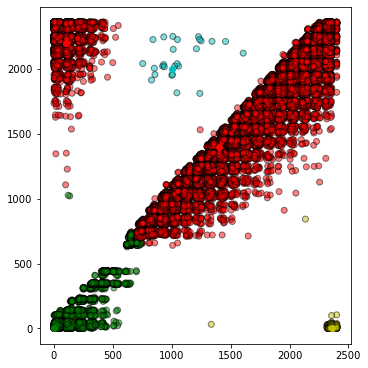

In [199]:
arrAnim()

In [200]:
from sklearn.cluster import KMeans

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

X_km = test_with_weather.loc[:, test_with_weather.columns != 'dep_delay'].select_dtypes(include=numerics)
y_km = test_with_weather['dep_delay']

In [201]:
X_train_km, X_test_km, y_train_km, y_test_km = train_test_split(X_km, y_km, test_size=0.2, stratify=y_km, random_state=42)

In [202]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [203]:
kmeans.fit(X_train_km, y_train_km)


KMeans(n_clusters=2, random_state=42)

In [204]:
len(kmeans.labels_)

776355

In [205]:
y_pred_km = kmeans.predict(X_train_km)
np.unique(y_pred_km)

array([0, 1], dtype=int32)

In [206]:
acc_km = kmeans.score(X_test_km, y_test_km)
acc_km

-380059448637.8484

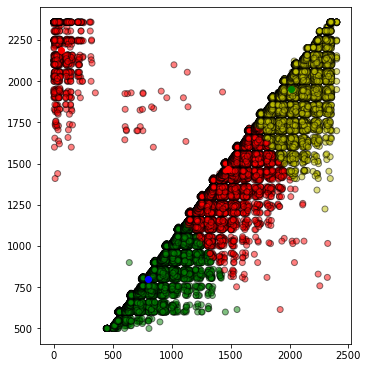

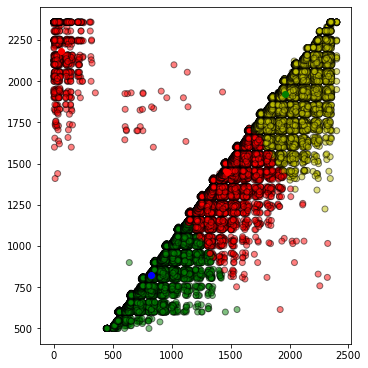

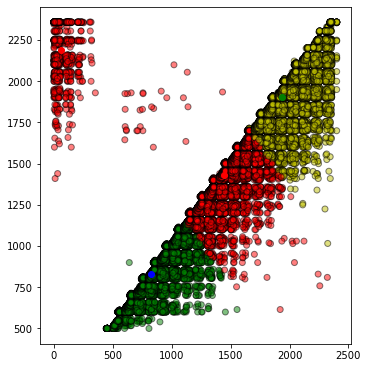

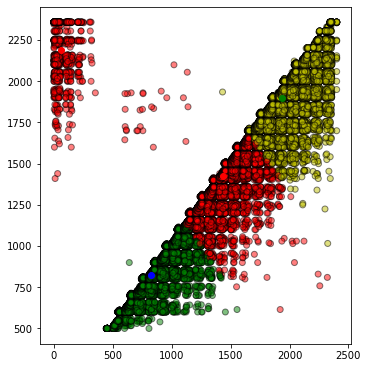

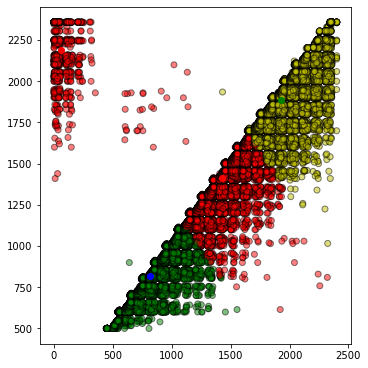

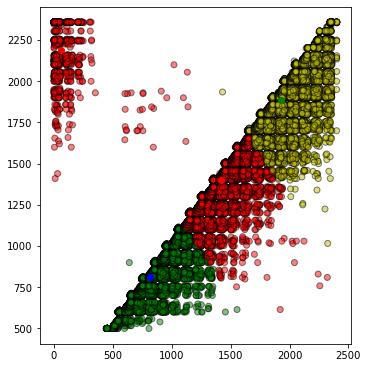

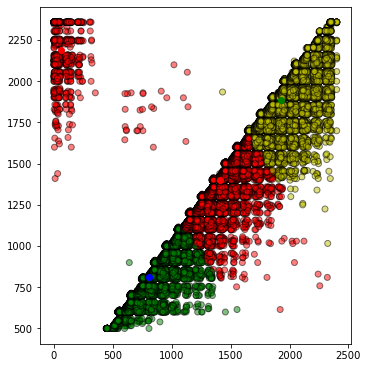

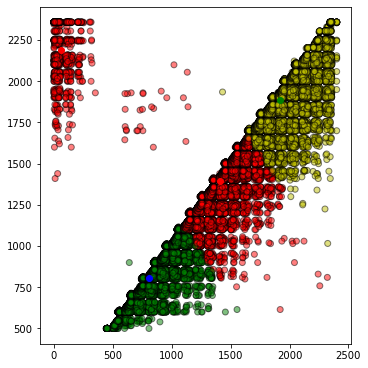

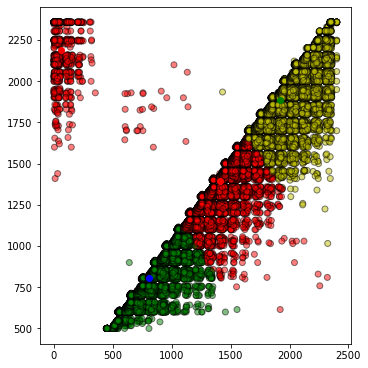

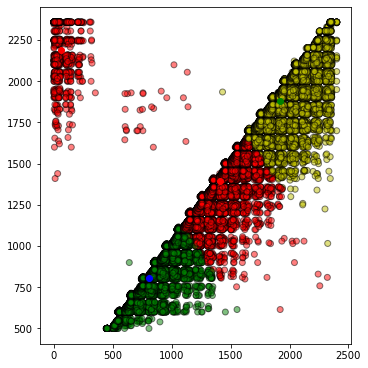

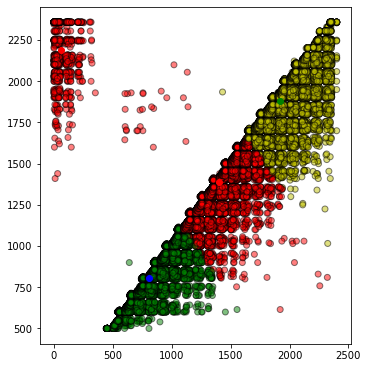

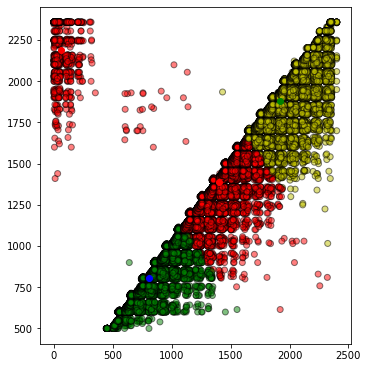

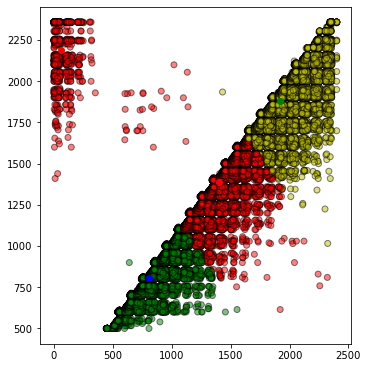

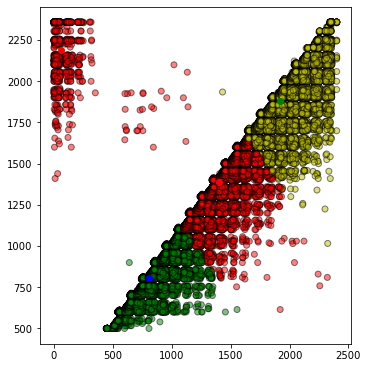

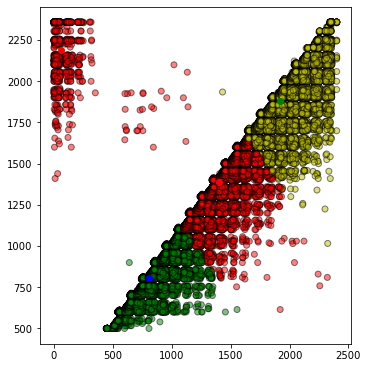

Error in callback <function flush_figures at 0x7fcf01b52790> (for post_execute):


KeyboardInterrupt: 

In [209]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df_flights[df_flights['closest'] == i]['dep_time'])
        centroids[i][1] = np.mean(df_flights[df_flights['closest'] == i]['sched_dep_time'])
    return k

import time
while True:
    closest_centroids = df_flights['closest'].copy(deep=True)
    centroids = update(centroids)
    df_flights = depAssign(df_flights, centroids)
    time.sleep(3)
    depAnim()
    if closest_centroids.equals(df_flights['closest']):
        depAnim()
        break

In [ ]:
'''
df_flights['period'] = df_flights['dep_time']

df_flights.head()

df_flights['period'] = pd.to_numeric(df_flights['period'])

df_flights.reset_index(inplace=True)

df_flights['period'] = df_flights['dep_time']

for i in range(len(df_flights['period'])):
    if(df_flights['dep_time'][i] <= 4):
        df_flights['period'][i] = "nuit"
        if(df_flights['dep_time'][i]  <= 12):
            df_flights['period'][i] = "matin"
            if(df_flights['dep_time'][i]  <= 18):
                df_flights['period'][i] = "apres-midi"
                if(df_flights['dep_time'][i]  <= 1):
                    df_flights['period'][i] = "soir"
    else:
        df_flights['period'][i] = "null"

df_flights['period']

df_flights["period"].unique()
'''